In [1]:
!pip install pycaret[full]

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import pandas as pd
data=pd.read_csv('/content/gdrive/MyDrive/DM_Assignment3/Tata_Motors_Employee_Reviews_from_AmbitionBox.csv')
data.head()

,Title,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
0,Senior Manager,"Pune, Maharashtra",Full Time,Engineering Department,4 Sep 2023,5.0,3.0,3.0,4.0,5.0,3.0,3.0,"Job security, Food",1. Processes are in place but not getting foll...
1,Customer Service Executive,"Mumbai, Maharashtra",Full Time,Retail Store Operations Department,2 Sep 2023,5.0,5.0,5.0,5.0,5.0,5.0,5.0,"We feel very good in this company, if any prob...",There is nothing about this company that we sh...
2,Senior Manager,Pune,Full Time,Production & Manufacturing Department,2 Sep 2023,4.0,5.0,2.0,2.0,4.0,3.0,1.0,Work life balance,Doesn’t have any proper policy regarding progr...
3,Data Entry Operator,"Jamshedpur, Jharkhand",Full Time,Production Department,2 Sep 2023,5.0,5.0,5.0,5.0,5.0,4.0,5.0,No any Competitor Entire World regarding our E...,No issues
4,Planning Engineer,"Sanand, Gujarat",Intern,Construction / Manufacturing Department,2 Sep 2023,4.0,1.0,1.0,3.0,4.0,1.0,2.0,job security and being a part of organization ...,people just dont work \nlazy going \nlower hie...


In [4]:
rating_columns = ['Overall_rating', 'work_life_balance', 'skill_development', 'salary_and_benefits',
                  'job_security', 'career_growth', 'work_satisfaction']
for col in rating_columns:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)
data['Job_type'].fillna('Unknown', inplace=True)

In [6]:
from pycaret.regression import *

In [10]:
exp_reg = setup(data, target='Overall_rating',
                ignore_features=['Date', 'Likes', 'Dislikes'],
                session_id=42,
                normalize=True, transformation=True)

,Description,Value
0,Session id,42
1,Target,Overall_rating
2,Target type,Regression
3,Original data shape,"(10752, 14)"
4,Transformed data shape,"(10752, 16)"
5,Transformed train set shape,"(7526, 16)"
6,Transformed test set shape,"(3226, 16)"
7,Ignore features,3
8,Numeric features,6
9,Categorical features,4


In [11]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.6608,0.8832,0.9390,0.2895,0.2441,0.2798,0.3540
br,Bayesian Ridge,0.6962,0.9046,0.9503,0.2722,0.2424,0.2782,0.3120
lr,Linear Regression,0.6966,0.9053,0.9507,0.2716,0.2425,0.2782,0.9250
ridge,Ridge Regression,0.6966,0.9053,0.9507,0.2716,0.2425,0.2782,0.2350
lar,Least Angle Regression,0.6966,0.9053,0.9507,0.2716,0.2425,0.2782,0.4310
omp,Orthogonal Matching Pursuit,0.6709,0.9214,0.9592,0.2586,0.2469,0.2796,0.2410
gbr,Gradient Boosting Regressor,0.6755,0.9287,0.9627,0.2528,0.2485,0.2785,1.0030
knn,K Neighbors Regressor,0.6315,0.9317,0.9641,0.2508,0.2453,0.2666,0.5840
catboost,CatBoost Regressor,0.6616,0.9433,0.9702,0.2408,0.2487,0.2690,3.5110
lightgbm,Light Gradient Boosting Machine,0.6627,0.9534,0.9752,0.2331,0.2498,0.2712,1.2570


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [12]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6604,0.8997,0.9485,0.2669,0.2470,0.2827
1,0.6342,0.7998,0.8943,0.3200,0.2308,0.2588
2,0.6983,1.0021,1.0011,0.2458,0.2607,0.3061
3,0.6125,0.7665,0.8755,0.3265,0.2262,0.2494
4,0.6612,0.8899,0.9434,0.2729,0.2446,0.2786
5,0.6679,0.9251,0.9618,0.2598,0.2498,0.2872
6,0.6517,0.8615,0.9282,0.3052,0.2429,0.2789
7,0.6850,0.9924,0.9962,0.2737,0.2648,0.3147
8,0.6554,0.8427,0.9180,0.3121,0.2384,0.2707


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [13]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7002,0.9208,0.9596,0.2497,0.2453,0.2820
1,0.6678,0.8249,0.9082,0.2986,0.2296,0.2576
2,0.7367,1.0258,1.0128,0.2280,0.2595,0.3054
3,0.6463,0.7886,0.8880,0.3071,0.2248,0.2483
4,0.7036,0.9189,0.9586,0.2493,0.2433,0.2778
5,0.7082,0.9563,0.9779,0.2348,0.2492,0.2871
6,0.6884,0.8783,0.9372,0.2917,0.2404,0.2769
7,0.7254,1.0121,1.0060,0.2593,0.2626,0.3129
8,0.6957,0.8762,0.9360,0.2848,0.2375,0.2694


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [18]:
tuned_lr= tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7002,0.9208,0.9596,0.2497,0.2453,0.2820
1,0.6678,0.8249,0.9082,0.2986,0.2296,0.2576
2,0.7367,1.0258,1.0128,0.2280,0.2595,0.3054
3,0.6463,0.7886,0.8880,0.3071,0.2248,0.2483
4,0.7036,0.9189,0.9586,0.2493,0.2433,0.2778
5,0.7082,0.9563,0.9779,0.2348,0.2492,0.2871
6,0.6884,0.8783,0.9372,0.2917,0.2404,0.2769
7,0.7254,1.0121,1.0060,0.2593,0.2626,0.3129
8,0.6957,0.8762,0.9360,0.2848,0.2375,0.2694


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [19]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

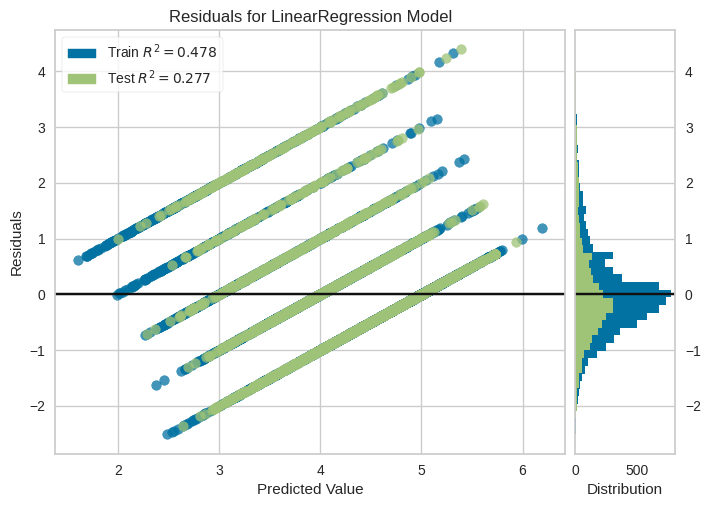

In [20]:
plot_model(tuned_lr)

In [21]:
final_model = finalize_model(tuned_lr)

In [22]:
data_copy = data.copy()
data_copy.drop('Overall_rating', axis=1, inplace=True)
data_copy.head()

,Title,Place,Job_type,Department,Date,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
0,Senior Manager,"Pune, Maharashtra",Full Time,Engineering Department,4 Sep 2023,3.0,3.0,4.0,5.0,3.0,3.0,"Job security, Food",1. Processes are in place but not getting foll...
1,Customer Service Executive,"Mumbai, Maharashtra",Full Time,Retail Store Operations Department,2 Sep 2023,5.0,5.0,5.0,5.0,5.0,5.0,"We feel very good in this company, if any prob...",There is nothing about this company that we sh...
2,Senior Manager,Pune,Full Time,Production & Manufacturing Department,2 Sep 2023,5.0,2.0,2.0,4.0,3.0,1.0,Work life balance,Doesn’t have any proper policy regarding progr...
3,Data Entry Operator,"Jamshedpur, Jharkhand",Full Time,Production Department,2 Sep 2023,5.0,5.0,5.0,5.0,4.0,5.0,No any Competitor Entire World regarding our E...,No issues
4,Planning Engineer,"Sanand, Gujarat",Intern,Construction / Manufacturing Department,2 Sep 2023,1.0,1.0,3.0,4.0,1.0,2.0,job security and being a part of organization ...,people just dont work \nlazy going \nlower hie...


In [23]:
prediction = predict_model(final_model, data = data_copy)
prediction.head()

,Title,Place,Job_type,Department,Date,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes,prediction_label
0,Senior Manager,"Pune, Maharashtra",Full Time,Engineering Department,4 Sep 2023,3.0,3.0,4.0,5.0,3.0,3.0,"Job security, Food",1. Processes are in place but not getting foll...,4.077774
1,Customer Service Executive,"Mumbai, Maharashtra",Full Time,Retail Store Operations Department,2 Sep 2023,5.0,5.0,5.0,5.0,5.0,5.0,"We feel very good in this company, if any prob...",There is nothing about this company that we sh...,4.565921
2,Senior Manager,Pune,Full Time,Production & Manufacturing Department,2 Sep 2023,5.0,2.0,2.0,4.0,3.0,1.0,Work life balance,Doesn’t have any proper policy regarding progr...,4.329388
3,Data Entry Operator,"Jamshedpur, Jharkhand",Full Time,Production Department,2 Sep 2023,5.0,5.0,5.0,5.0,4.0,5.0,No any Competitor Entire World regarding our E...,No issues,4.285905
4,Planning Engineer,"Sanand, Gujarat",Intern,Construction / Manufacturing Department,2 Sep 2023,1.0,1.0,3.0,4.0,1.0,2.0,job security and being a part of organization ...,people just dont work \nlazy going \nlower hie...,2.991625
